In [1]:
#pip install --upgrade tensorflow

A. Build a baseline model (5 marks) 

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error  as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [2]:
# import libraries
import tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# load data
concrete_data = pd.read_csv('C:/Users/Thales/Downloads/concrete_data.csv')

In [4]:
concrete_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
# train
feature = concrete_data[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]
# Predictor
target = concrete_data[['Strength']]

In [6]:
# train Test split
x_train_feature, x_test_feature, y_train_target, y_test_target = train_test_split(feature,target,test_size=0.30)
x_train_feature.shape

(721, 8)

In [7]:
# call model
model = tensorflow.keras.models.Sequential()

In [8]:
# add input layer
model.add(tensorflow.keras.layers.Dense(5, activation='relu', input_shape=(x_train_feature.shape[1],)))

In [9]:
# add hidden layer
model.add(tensorflow.keras.layers.Dense(10, activation='relu'))
model.add(tensorflow.keras.layers.Dense(10, activation='relu'))
model.add(tensorflow.keras.layers.Dense(10, activation='relu'))

In [10]:
# add output layer
model.add(tensorflow.keras.layers.Dense(1))

In [11]:
# add optimizer and error metrics
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
# train model
model.fit(x_train_feature, y_train_target, epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 362.5270
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 289.2319
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 234.9230
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 171.0544
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 152.1236
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 144.9457
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 145.1135
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 143.7359
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 136.5252
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 130.7024
Epoch 11/100
23/23 [==============================] - 0s 2ms/step - loss: 128.3210
Epoch 12/100
23/23 [==============================] - 0s 1ms/step - loss: 131.9902
Epoch 13/100


In [13]:
#model evaluation
model.evaluate(x_test_feature, y_test_target)

10/10 [==============================] - 0s 1ms/step - loss: 89.2099


89.20993041992188

In [14]:
# predictions
y_pred_from_test_feature = model.predict(x_test_feature)

10/10 [==============================] - 0s 1ms/step


In [15]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
# mean squared error
m = mse(y_test_target, y_pred_from_test_feature)
# mean
mean = np.mean(m)
# standard deviation
std = np.std(m)
print(mean, std)

89.20993443348064 0.0


In [16]:
from sklearn.metrics import mean_squared_error
number_of_times_mean_squared_errors = 50
total_epochs = 100

mean_squared_errors_list = []
for i in range(0,number_of_times_mean_squared_errors):
    # split the train and test datasets
    X_train_fifty, X_test_fifty, Y_train_fifty, Y_test_fifty = train_test_split(feature, target, test_size=0.3, random_state=i)
    
    # fit the model
    model.fit(X_train_fifty, Y_train_fifty, epochs=total_epochs, verbose=0)
    
    # evaluate the model
    mse_fifty = model.evaluate(X_test_fifty, Y_test_fifty, verbose=0)
    print("mean_square_error at " + str(i+1) + " is " + str(mse_fifty))
    
    # get the prediction
    Y_pred_fifty = model.predict(X_test_fifty)
    
    # get the mean square error
    mean_square_error_fifty = mean_squared_error(Y_test_fifty, Y_pred_fifty)
    
    # append result to the mean_squared_errors list
    mean_squared_errors_list.append(mean_square_error_fifty)

# convert to array list
mean_squared_errors_array_of_fifty = np.array(mean_squared_errors_list)

# get mean value from the array list
mean_fifty = np.mean(mean_squared_errors_array_of_fifty)

# get standard deviation using the array list
standard_deviation_fifty = np.std(mean_squared_errors_array_of_fifty)

print('\n')
print('\n')
print("The output below is the mean and standard deviation of fifty times of  " + str(number_of_times_mean_squared_errors) + " mean squared errors without normalized data.")
print("- Number of epochs for each training: " + str(total_epochs))
print("- Mean for fifty times: " + str(mean_fifty))
print("- Standard Deviation for fifty times: " + str(standard_deviation_fifty))

mean_square_error at 1 is 52.646697998046875
10/10 [==============================] - 0s 1ms/step
mean_square_error at 2 is 54.643001556396484
10/10 [==============================] - 0s 751us/step
mean_square_error at 3 is 44.2534065246582
10/10 [==============================] - 0s 943us/step
mean_square_error at 4 is 43.049625396728516
10/10 [==============================] - 0s 958us/step
mean_square_error at 5 is 42.37250518798828
10/10 [==============================] - 0s 819us/step
mean_square_error at 6 is 46.267547607421875
10/10 [==============================] - 0s 951us/step
mean_square_error at 7 is 56.556705474853516
10/10 [==============================] - 0s 1ms/step
mean_square_error at 8 is 40.345001220703125
10/10 [==============================] - 0s 1ms/step
mean_square_error at 9 is 35.5805778503418
10/10 [==============================] - 0s 728us/step
mean_square_error at 10 is 41.80849075317383
10/10 [==============================] - 0s 1ms/step
mean_square_e

Result Analysis

In [17]:
x_test_feature.shape, y_test_target.shape, y_train_target.shape, x_train_feature.shape

((309, 8), (309, 1), (721, 1), (721, 8))

10/10 [==============================] - 0s 1ms/step


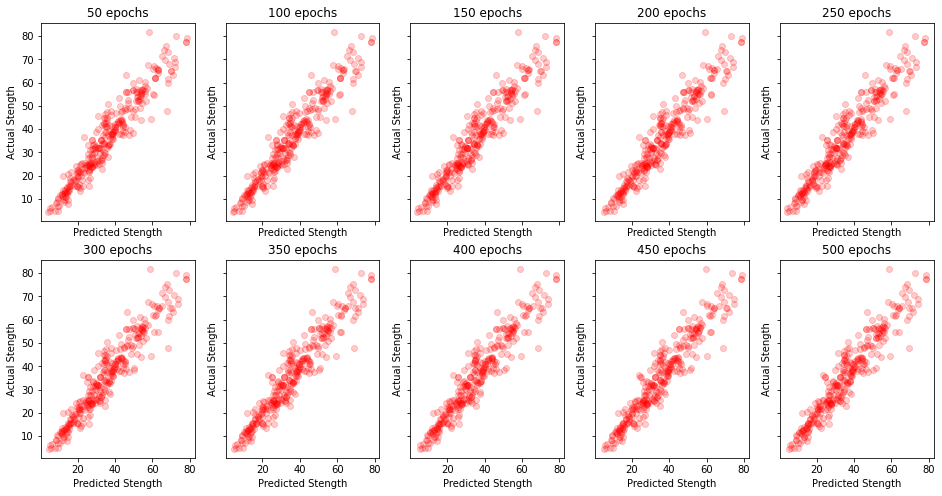

In [18]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(16,8), sharex=True, sharey=True)
losses_for_each_epochs = []
for i in range(2):
    for j in range(5):
        model.fit(x_train_feature, y_train_target, epochs=50, batch_size=128, verbose=0);
        pred_loss_from_feature_target = model.evaluate(x_test_feature, y_test_target, verbose=0)
        losses_for_each_epochs.append(pred_loss_from_feature_target)
        prediction_from_test_feature = model.predict(x_test_feature)
        axes[i,j].scatter(prediction_from_test_feature, y_test_target, alpha=0.2, color= 'red')
        axes[i,j].set_title('{0} epochs'.format((5*i+j+1)*50))
        axes[i,j].set_ylabel('Actual Stength')
        axes[i,j].set_xlabel('Predicted Stength')

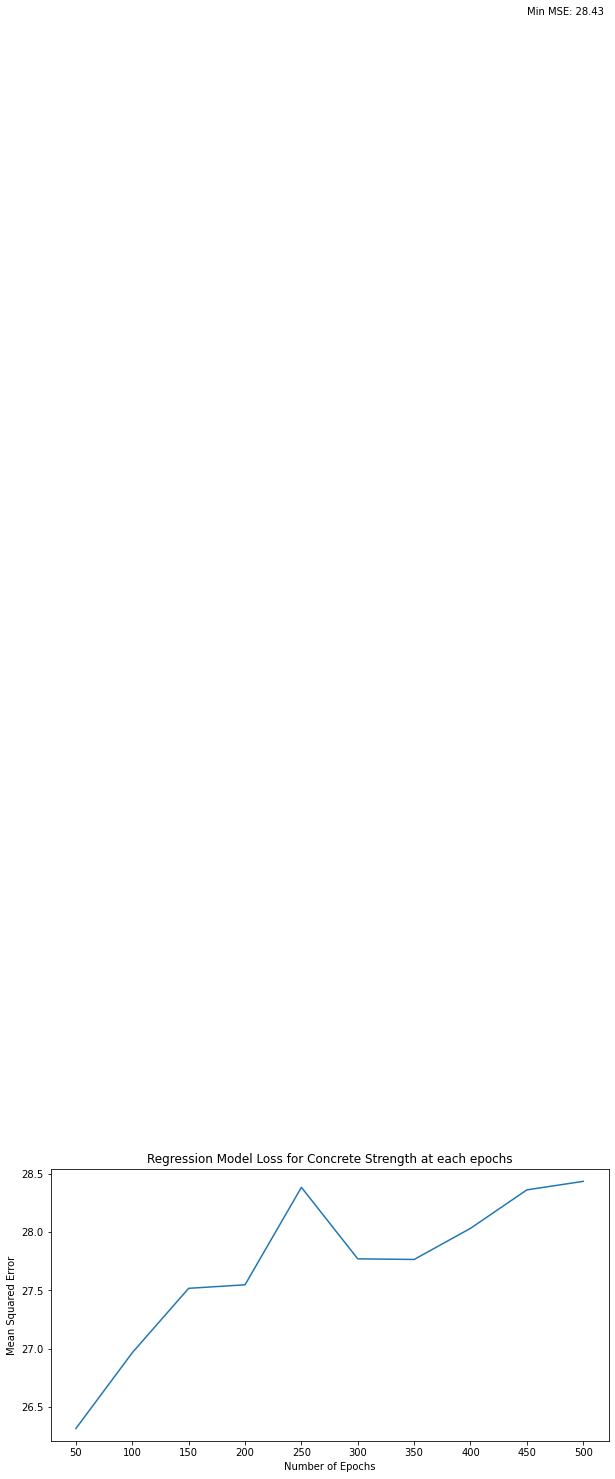

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(losses_for_each_epochs)
ax.set_title('Regression Model Loss for Concrete Strength at each epochs')
number_of_epochs = [str(i*50) for i in range(1, len(losses_for_each_epochs)+1)]
ax.set_xticks(range(len(losses_for_each_epochs)))
ax.set_xticklabels(number_of_epochs)
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Mean Squared Error')
ax.text(len(losses_for_each_epochs)-2, losses_for_each_epochs[len(losses_for_each_epochs)-1]+10, 'Min MSE: {0:.2f}'.format(losses_for_each_epochs[len(losses_for_each_epochs)-1]));